In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Problem 1 - Quality Score

In [309]:
def find_fraction_qualScore(filename):
    seqs1 = open(filename, 'r').readlines()
    quality = []
    for i in range(0, 40000):
        if(i%4==3):
            quality.append(seqs1[i])
    above_30 = []
    total = []
    
    for i in range(0, 250):
        above_30.append(0)
        total.append(0)

    for seq in quality:
        seq
        if (len(seq) < 250):
            size = len(seq) - 1
        else:
            size = 250

        for i in range(0, size):
            if ((ord(seq[i])-33) >= 30):
                above_30[i] += 1
            total[i] += 1

    fraction = []
    for i in range(0, 250):
        fraction.append(above_30[i]/total[i])
    return fraction

In [310]:
file1 = "XI1_ATCACG_L001_R1_001(1).fastq"
file2 = "XI1_ATCACG_L001_R2_001(1).fastq"
seq1_frac = find_fraction_qualScore(file1)
seq2_frac = find_fraction_qualScore(file2)

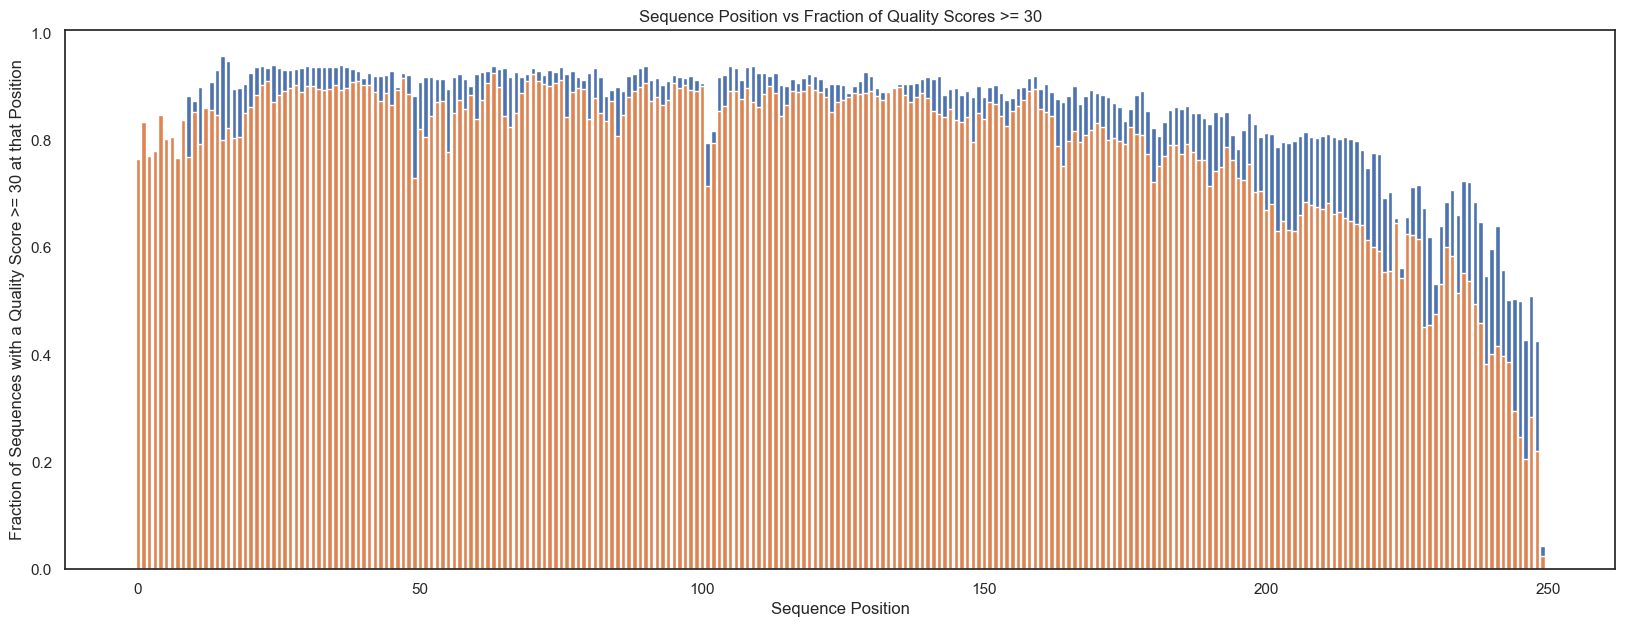

In [311]:
plt.figure(figsize=(20,7))
plt.bar(range(len(seq1_frac)), seq1_frac)
plt.bar(range(len(seq2_frac)), seq2_frac)
sns.set(style="white")
plt.xlabel('Sequence Position')
plt.ylabel('Fraction of Sequences with a Quality Score >= 30 at that Position')
plt.title('Sequence Position vs Fraction of Quality Scores >= 30');

The above graph shows that the first sequence has a higher amount of positions where the fraction of quality scores over or equal to 30 to total scores then the second sequence

# Problem 2 - Open Reading Frames

In [298]:
def divide_genes(string, start):
    final = [string[i:i + 3] for i in range(start, len(string), 3)]
    remainder = string[0:start]
    final.insert(0, remainder)
    return final

def reverse_complement_string(string):
    reverse_complement_string = ""
    reverse_string = string[::-1]
    for i in range(0,len(reverse_string)):
        if reverse_string[i] == 'G':
            reverse_complement_string += 'C'
        elif reverse_string[i] == 'C':
            reverse_complement_string += 'G'
        elif reverse_string[i] == 'A':
            reverse_complement_string += 'T'
        else:
            reverse_complement_string += 'A'
    return reverse_complement_string

def find_ORFs(sequence, threshold):
    sequence_reversed = reverse_complement_string(sequence)
    frame1 = divide_genes(sequence, 0)
    frame2 = divide_genes(sequence, 1)
    frame3 = divide_genes(sequence, 2)
    frame_neg_1 = divide_genes(sequence_reversed, 0)
    frame_neg_2 = divide_genes(sequence_reversed, 1)
    frame_neg_3 = divide_genes(sequence_reversed, 2)
    
    frame1.append(1)
    frame2.append(2)
    frame3.append(3)
    frame_neg_1.append(-1)
    frame_neg_2.append(-2)
    frame_neg_3.append(-3)
    
    frames = [frame1, frame2, frame3, frame_neg_1, frame_neg_2, frame_neg_3]
    orfs = []
    
    inside = False
    size = 0
    
    for frame in frames:
        start_codons = []
        for i in range(0, len(frame)):
            if frame[i] == "ATG":
                start_codons.append(i)
        for start in start_codons:
            size = 0
            end = -1
            for i in range(start, len(frame)):
                size += 1
                if (frame[i] == "TAG") or (frame[i] == "TAA") or (frame[i] == "TGA"):
                    end = i
                    break
            if size >= threshold and end >= 0:
                start_pos = (start - 1) * 3 + len(frame[0])
                end_pos = (end - 1) * 3 + len(frame[0])
                orfs.append([frame[-1],start_pos, end_pos])
    return orfs

In [299]:
example = 'AATGCCCAAATGCTTTTAAAACCCATGTAGC'
find_ORFs(example, 5)

[[1, 9, 27], [2, 1, 16]]

# Problem 3 - ACE2

In [300]:
file3 = 'ACE2(1).fasta'

def read_fasta(filename):
    lines = open(filename, 'r').readlines()
    lines.pop(0)
    sequence = ''.join(lines)
    sequence = sequence.replace('\n', '')
    return sequence
    
ACE2 = read_fasta(file3)
find_ORFs(ACE2, 700)

[[2, 49, 2464], [2, 232, 2464], [2, 292, 2464]]